# import

In [ ]:
from google.colab import drive
drive.mount ('/content/gdrive')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import datetime
import pandas  as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Mounted at /content/gdrive


In [ ]:
#Load data từ file csv
data = pd.read_csv('/content/gdrive/MyDrive/DoAnCuoiKyDeepLearning/gold_price_data.csv')

In [ ]:
#SPX: giá thị trường chứng khoán bao gồm 500 cổ phiếu của các công ty lớn được giao dịch
##trên thị trường chứng khoán Hoa Kỳ
#GLD: giá vàng
#USO: giá quỹ dầu mỏ hoa kỳ
#SLV: giá Bạc
#EUR/USD: chênh lệch tỉ giá giữa Euro và Đô la Mỹ
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#phát hiện các giá trị bị thiếu
data.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
#giá trị trung bình, độ lệch chuẩn, min, max và tỷ lệ phần trăm của các cột
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
#Thông tin tổng quát về data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


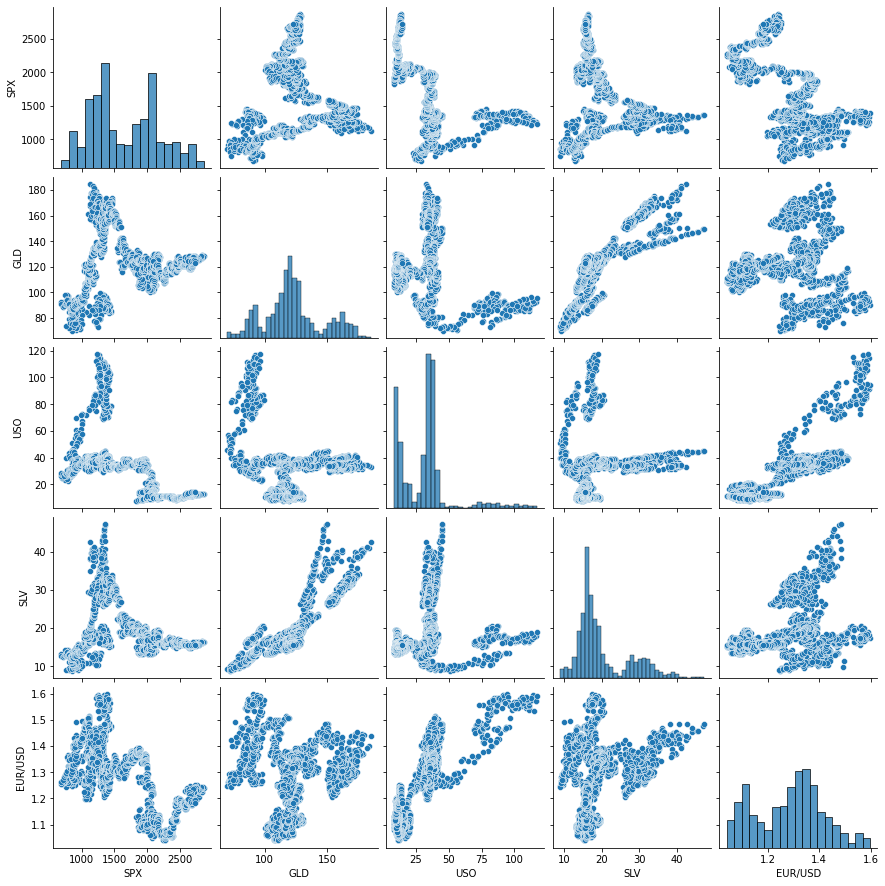

In [ ]:
#Trực quan về dữ liệu phân bố bằng Seaborn
sns.pairplot(data)

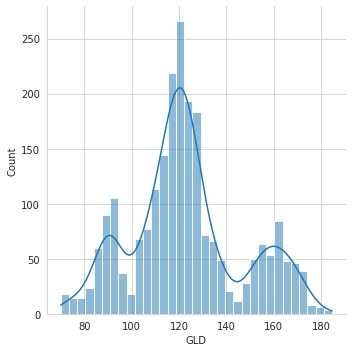

In [ ]:
# Biểu đồ phân phối giá vàng
sns.set_style("whitegrid")
sns.displot(data['GLD'], kde = True)

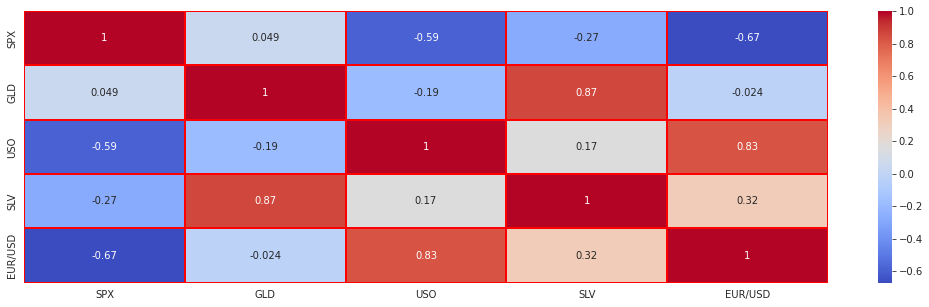

In [ ]:
# Kiểm tra độ tương quan giữa các cột bằng bản đồ nhiệt
plt.figure(figsize=(18,5))
sns.heatmap(data.corr(), annot=True, lw = 1, linecolor="r",cmap="coolwarm")

# **Xây dựng mô hình dự đoán bằng thư viện Scikit – Learn**

In [ ]:
#Phân tách dữ liệu thành train và test
X = data[['SPX', 'USO', 'SLV', 'EUR/USD']]#mảng X chứa các tính năng cần đào tạo (các biến độc lập)
y = data['GLD']#mảng y chứa biến mục tiêu (biến phụ thuộc)

In [ ]:
#tạo 4 biến, gồm X_train, y_train và X_test, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
#dữ liệu train và test ta vừa tạo
print(X_train)

              SPX        USO        SLV   EUR/USD
1360  1877.030029  36.570000  20.660000  1.373419
534   1089.630005  34.330002  17.860001  1.231906
1622  2080.149902  20.820000  15.770000  1.134147
1207  1614.959961  34.669998  18.930000  1.306762
1291  1804.760010  34.040001  19.129999  1.347182
...           ...        ...        ...       ...
599   1158.060059  35.459999  22.020000  1.392796
1599  2061.020020  17.139999  16.219999  1.088637
1361  1878.040039  36.779999  20.080000  1.386309
1547  2028.260010  17.410000  15.870000  1.187070
863   1236.469971  37.880001  30.490000  1.337167

[1603 rows x 4 columns]


In [ ]:
print(y_train)

1360    130.169998
534     119.599998
1622    114.360001
1207    121.129997
1291    119.919998
           ...    
599     130.369995
1599    115.059998
1361    129.089996
1547    118.559998
863     161.990005
Name: GLD, Length: 1603, dtype: float64


In [ ]:
print(X_test)

              SPX        USO        SLV   EUR/USD
1230  1689.469971  37.759998  20.620001  1.329292
376   1057.579956  35.959999  17.250000  1.478131
2117  2474.020020  10.150000  15.980000  1.176152
1453  1933.750000  35.990002  19.170000  1.336612
1625  2099.120117  20.740000  15.810000  1.122146
...           ...        ...        ...       ...
1279  1770.489990  34.189999  21.000000  1.347309
490   1166.589966  38.830002  16.610001  1.341004
780   1331.939941  38.810001  39.889999  1.450810
62    1369.310059  83.650002  17.230000  1.573688
52    1330.739990  85.800003  19.379000  1.565803

[687 rows x 4 columns]


# **Tạo model và training Linear Regression**

In [ ]:
#Huấn luyện mô hình với hàm hồi quy tuyến tính
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
#các hệ số sau khi hồi quy
lm.coef_

array([ 6.58434327e-03, -2.55844584e-01,  3.14771276e+00, -8.96913497e+00])

In [ ]:
#in ra giá trị của b0 (giao điểm chặn)
print(lm.intercept_)

68.21686004093691


# **Dự đoán và đánh giá mô hình**

In [ ]:
#Lấy kết quả dự đoán từ X_test, dùng phương thức predict() truyền đối số X_test vào
predictions = lm.predict(X_test)
print(predictions)

[122.6634602  107.02064719 121.66121847 120.09488694 116.4326306
 124.91152566 142.68315001 121.3554871  104.16659794 120.72668271
 116.39543443 114.57415388 145.09343279 114.50002329 114.43860046
  96.0529044  159.39105084 119.64313568 113.40898538 163.06658376
 140.31998636 110.52003642 131.6651     122.47306921 120.07886399
  91.10740706 121.62983002  94.62754593 122.27741478 119.74208646
 104.83681963 147.57601151 144.06087708 116.01346004 117.88370304
 180.30171204 101.70047438 116.95010675 153.60629921 116.06312798
 115.81436034 117.93793606 145.28613614 117.79929278 124.91866604
 118.70849141  91.592545   107.38857457 112.00495302 119.87701827
 139.42871349 100.11358124 111.65240521 143.7600417  118.70987882
 142.27422702 122.15968066 156.05722292 154.67085123 126.20965353
 104.99912572 172.12580098 150.79321448  99.02634543 118.48636025
 110.94794868 116.77118507 107.06650948 119.00314815 123.04700929
  97.31032104 117.19517133 163.32262223 200.31098614  94.84527276
 119.278065

Text(0, 0.5, 'Predicted Y')

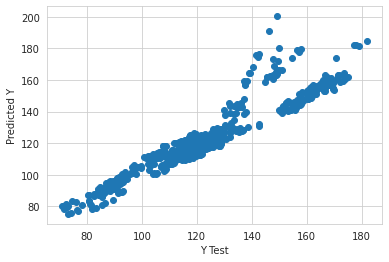

In [ ]:
#Dùng scatter truyền vào 2 giá trị trên vào để quan sát
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
#dùng biểu đồ cufflinks để trực quan hơn
import cufflinks as cf
cf.go_offline()
import plotly.io as pio
pio.renderers.default = "colab"
pd.DataFrame({"Giá dự đoán":predictions, "Giá ban đầu": y_test}).iplot(mode="markers")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



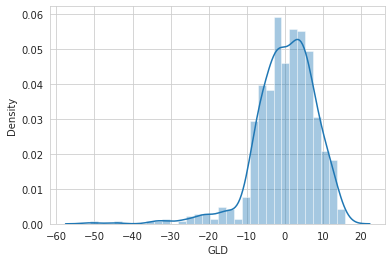

In [ ]:
#dùng đồ thị distplot() và tìm hiểu sự phân phối của độ chênh lệch.
sns.distplot(y_test - predictions)

Đánh giá mô hình hồi quy

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions)) #Độ chênh lệch giá trị
print('MSE:', metrics.mean_squared_error(y_test, predictions))  #Hàm mất mát
#Giá trị chênh lệch trung bình giữa giá dự đoán và giá trị test ban đầu
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.9387732071312955
MSE: 63.5469369638793
RMSE: 7.971633268275661


In [ ]:
#kiểm tra độ chính xác mô hình trên dựa trên phương sai MSE
metrics.explained_variance_score(y_test, predictions)

0.8864383929571654

In [ ]:
#đánh giá sực tác động của các tính năng ( các biến độc lập) lên kết quả đầu ra (biến phụ thuộc)
#sử dụng hệ số Coeff
print(lm.coef_)

[ 6.58434327e-03 -2.55844584e-01  3.14771276e+00 -8.96913497e+00]


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Hệ số'])
coeff_df

,Hệ số
SPX,0.006584
USO,-0.255845
SLV,3.147713
EUR/USD,-8.969135
